In [169]:
x, p, y = var('x, p, y')

In [170]:
a, h = var('a, h')

In [171]:
assume(a>0)

In [172]:
def psi(n):
    return 1/sqrt(2^n*factorial(n)*a*sqrt(pi))*exp(-x^2/(2*a^2))*hermite(n,x)

In [173]:
psi(0).show()

e^(-1/2*x^2/a^2)/sqrt(sqrt(pi)*a)

In [174]:
from sage.symbolic.integration.integral import definite_integral

In [175]:
def W_n(n):
    return 1/(2*pi*h)*definite_integral(psi(n).subs(x=x+1/2*y)*psi(n).subs(x=x-1/2*y)*exp(-i/h*p*y), y, -oo, oo)

In [225]:
W0f = fast_callable(W_n(0).subs(a=1,h=1), vars=[x,p])
W1f = fast_callable(W_n(1).subs(a=1,h=1), vars=[x,p])
W2f = fast_callable(W_n(2).subs(a=1,h=1), vars=[x,p])
W3f = fast_callable(W_n(3).subs(a=1,h=1), vars=[x,p])
W7f = fast_callable(W_n(7).subs(a=1,h=1), vars=[x,p])
W9f = fast_callable(W_n(9).subs(a=1,h=1), vars=[x,p])

In [210]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
#     "font.family": "sans-serif",
})

%matplotlib notebook

<IPython.core.display.Javascript object>


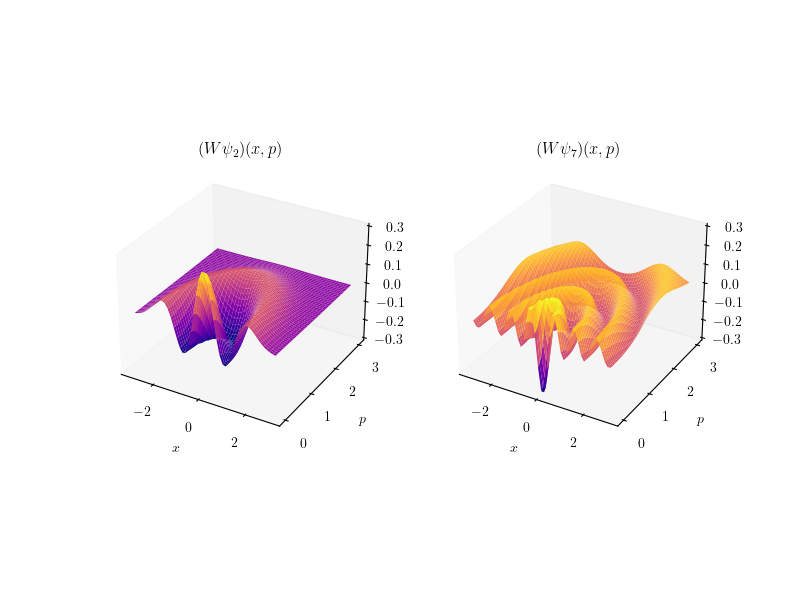

In [257]:
fig = plt.figure(figsize = (8,6))
# fig.set_tight_layout({'pad': 0})

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax1.grid(False)
ax2.grid(False)

xs = np.linspace(-3,3,50)
ps = np.linspace(0,3,50)

X, P = np.meshgrid(xs, ps)
Z1 = W2f(X, P)
Z2 = W7f(X, P)

surf1 = ax1.plot_surface(X, P, Z1, cmap=plt.cm.plasma, alpha=1)
# surf1 = ax1.plot_surface(X, P, Z1, color='m', alpha=1)
# cset  = ax1.contour(X, P, Z1, zdir='z', offset=-0.3, cmap=plt.cm.plasma)

surf2 = ax2.plot_surface(X, P, Z2, cmap=plt.cm.plasma, alpha=1)
# surf2 = ax2.plot_surface(X, P, Z2, color='m', alpha=1)
# cset  = ax2.contour(X, P, Z2, zdir='z', offset=-0.3, cmap=plt.cm.plasma)

# Set axes label
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$p$')
ax1.set_title(r'$(W\psi_2)(x,p)$')
ax1.set_zlim3d(-0.3, 0.3)

ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$p$')
ax2.set_title(r'$(W\psi_7)(x,p)$')
ax2.set_zlim3d(-0.3, 0.3)

# plt.title(r'Función de Wigner del estado $\psi_3$')

plt.show()